# Classificação de Notícias usando o Google Gemini

In [ ]:
from google.colab import userdata


In [ ]:
API_KEY = userdata.get('SECRET_KEY2')

In [ ]:
from google import genai


Gerando embeddings de uma frase

In [ ]:

client = genai.Client(api_key=API_KEY)

result = client.models.embed_content(
        model="gemini-embedding-exp-03-07",
        contents="Batman é melhor que superman")

print(result.embeddings)

[ContentEmbedding(values=[-4.9293256e-05, 0.008584676, 0.023920484, -0.07188272, 0.0016042575, 0.023481729, 0.008627305, 0.021494694, 0.008350214, -0.020133305, 0.0063403994, 0.019140454, -0.017761247, 0.01138666, 0.10961919, -0.0018779612, -0.014230844, 0.013013146, -0.013997765, -0.0042687347, 0.002128352, -0.0073142163, 0.032854192, 0.007981313, 0.005187811, 0.039560955, 0.0021981737, -0.0009988273, -0.0037227245, 0.05047486, 0.028803477, 0.005148425, 0.0068156105, 0.009697146, -0.0089582335, 0.031754006, 0.012256053, 0.010586506, 0.0010959173, -0.00023745841, -0.010033264, -0.010980444, 0.03672912, -0.0074379803, 0.01680804, 0.007901084, -0.007903747, -0.023122601, -0.0077654026, -0.0045163105, 0.0011088483, 0.00034463956, -0.012509646, -0.1639724, -0.003450831, -0.0036434333, 0.008050002, -0.018243708, -0.0010712505, 0.021929333, 0.0023623784, 0.013582257, -0.028127704, -0.002920875, -0.00609511, 0.004896441, 0.027092138, -0.016061364, 0.010113245, 0.0037540814, 0.037416, -0.02219

## Classificação de texto

In [ ]:
import google.generativeai as genai


In [ ]:
genai.configure(api_key=API_KEY)


Verificando os tipos de modelos que temos disponível

In [ ]:
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004
models/gemini-embedding-exp-03-07
models/gemini-embedding-exp


## Explorando a base de dados de Noticias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Lendo a base de dados de noticias

In [ ]:
df = pd.read_csv('/content/News Categoires.csv',encoding='latin-1')

In [ ]:
df.head()

,News,Category
0,The IMF now expects China's economy to grow by...,Economy
1,Manufacturing activity in the Eurozone has dec...,Economy
2,Continued disruptions in the global supply cha...,Economy
3,Concerns about food security remain high due t...,Economy
4,"While some central banks, like the US Federal ...",Economy


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Economy'),
  Text(1, 0, 'Health'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Politics'),
  Text(5, 0, 'International relations'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Artificial Intelligence ')])

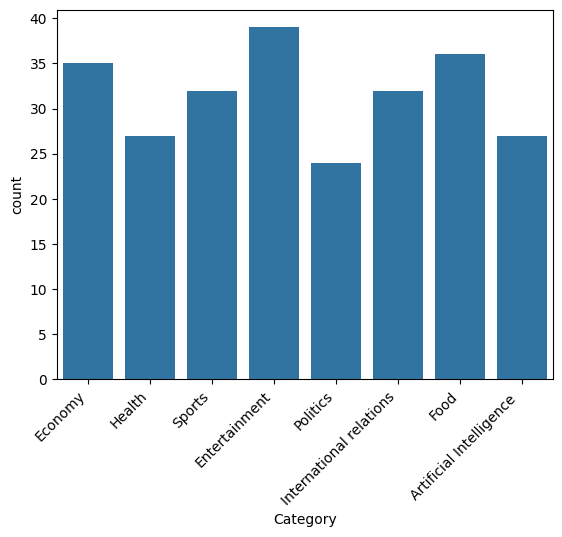

In [ ]:
sns.countplot(x=df.Category)
plt.xticks(rotation=45, ha='right')


Transformando as categorias em números

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
df.Category.unique()

array(['Economy', 'Health', 'Sports', 'Entertainment', 'Politics',
       'International relations', 'Food', 'Artificial Intelligence '],
      dtype=object)

In [ ]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['Category'])


In [ ]:
df.target.unique()

array([1, 4, 7, 2, 6, 5, 3, 0])

In [ ]:
df.head(30)

,News,Category,target
0,The IMF now expects China's economy to grow by...,Economy,1
1,Manufacturing activity in the Eurozone has dec...,Economy,1
2,Continued disruptions in the global supply cha...,Economy,1
3,Concerns about food security remain high due t...,Economy,1
4,"While some central banks, like the US Federal ...",Economy,1
5,Bangladeshi workers abroad continue to send st...,Economy,1
6,The Centre for Economics and Business Research...,Economy,1
7,Bangladesh has maintained macroeconomic stabil...,Economy,1
8,Government investments in infrastructure proje...,Economy,1
9,"he US unemployment rate has dropped to 3.5%, i...",Economy,1


### Treinando um classificador dos tipos de notícias

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:

# Corte cada entrada de texto até 5.000 caracteres

df['texto_cortado'] = df['News'].apply(lambda x: x[:5000] if isinstance(x, str) else x)


In [ ]:
X= df.texto_cortado
y=df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Garante a mesma proporção de classes no treino e teste
)

In [ ]:
y_train.value_counts()


,count
target,
2,31
3,29
1,28
5,25
7,25
4,22
0,22
6,19


In [ ]:
y_test.value_counts()


,count
target,
2,8
1,7
7,7
5,7
3,7
4,5
6,5
0,5


In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
df_train

,texto_cortado,target
110,A new study has found that coffee may help pro...,3
88,Talks between Iran and the United States on re...,5
155,"Bobbi Jean Carter's family speaks out, sharin...",2
36,Former NFL stars Julius Peppers and Antonio Ga...,7
156,Aamir Khan takes an active role in preparation...,2
...,...,...
75,"On October 30, 2023, Jair Bolsonaro lost his r...",6
148,"The Golden Globes announce nominations, with ""...",2
167,"Despite recent harvests, the World Food Progra...",3
182,Diplomatic efforts to manage North Korea's nuc...,5


criando os embeddings

In [ ]:
df_test.shape

(51, 2)

In [ ]:
df_train.shape

(201, 2)

In [ ]:
df_train_100 = df_train.loc[:100]


In [ ]:
from google.api_core import retry

#genai.configure(api_key=API_KEY)

In [ ]:
def make_embed_text_fn(model):
  @retry.Retry(timeout=300.0)
  def embed_fn(text: str) -> list[float]:
    # Set the task_type to CLASSIFICATION.
    embedding = genai.embed_content(model=model,
                                    content=text,
                                    task_type="classification"
                          )
    return embedding['embedding']

  return embed_fn

def create_embeddings(model, df):
  df['Embeddings'] = df['texto_cortado'].apply(make_embed_text_fn(model))
  return df

In [ ]:
model = 'models/embedding-001'
df_train_100 = create_embeddings(model, df_train_100)

<ipython-input-36-55853fad5721>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embeddings'] = df['texto_cortado'].apply(make_embed_text_fn(model))


In [ ]:
df_test = create_embeddings(model, df_test)


In [ ]:
df_train_100.head()

,texto_cortado,target,Embeddings
110,A new study has found that coffee may help pro...,3,"[-0.055520013, 0.0014894467, -0.038100123, -0...."
88,Talks between Iran and the United States on re...,5,"[0.012896312, 0.002712637, -0.06743488, -0.034..."
155,"Bobbi Jean Carter's family speaks out, sharin...",2,"[0.02564156, -0.042014185, -0.00031520467, -0...."
36,Former NFL stars Julius Peppers and Antonio Ga...,7,"[0.03436601, -0.0047137365, -0.015069569, -0.0..."
156,Aamir Khan takes an active role in preparation...,2,"[0.016279299, -0.021395579, -0.011082936, 0.00..."


### Avaliando o desempenho

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Inicializa o validador com estratificação
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelo de exemplo
model = RandomForestClassifier(random_state=42)

#convertendo o formato dos embeddings em um formato numpy array que o Random forest entenda
X_embeddings = np.vstack(df_train_100.Embeddings.values)



In [ ]:
# Avalia com cross_val_score usando o stratified k-fold
scores = cross_val_score(model, X_embeddings, df_train_100.target, cv=skf, scoring='recall_macro')

print("Recall por fold:", scores)
print("Média do recall:", scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Recall por fold: [0.66666667 0.5        0.42857143 0.14285714 0.14285714]
Média do recall: 0.37619047619047613


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
